# Class 7: Big Data 1 — Algorithmic Complexity & Computing Paths

1. Come in. Sit down. Open Teams.
2. Make sure your notebook from last class is saved.
3. Open up the Jupyter Lab server.
4. Open up the Jupyter Lab terminal.
5. Activate Conda: `module load anaconda3/2022.05`
6. Activate the shared virtual environment: `source activate /courses/PHYS7332.202510/shared/phys7332-env/`
7. Run `python3 git_fixer2.py`
8. Github:
    - git status (figure out what files have changed)
    - git add ... (add the file that you changed, aka the `_MODIFIED` one(s))
    - git commit -m "your changes"
    - git push origin main
________

## Goals of today's class
1. Understand algorithmic complexity at a high level
2. Think about path lengths in weighted & unweighted graphs.
3. Analyze path length distributions in a real network

## What is algorithmic complexity?
Algorithmic complexity is a fancy way of saying "how much time and/or space will running this algorithm cost me as the data I run it on gets bigger?" There are often a lot of ways to solve a computational problem, some that are much less efficient than others, and computational complexity gives a way to compare solutions based on the time and space they use to arrive at a solution. When we talk about a way to solve a computational problem, we're usually referring to an **algorithm**, which is just a set of instructions for solving a problem or completing a task. 

When a dataset is really big, or a task is really complicated, the amount of computations and storage space required to solve a particular problem can really start to be a limiting factor -- this is why ERGMs (exponential random graph models) do not work **at all** on million-node datasets, for example -- and thinking carefully about algorithmic complexity becomes very important. 

### Sorting, but really badly
As an illustrative example, let's look at the task of sorting a deck of cards. One really awful sorting algorithm is called **bogosort**. Bogosort simply has us shuffle the deck of cards, check if it is sorted, and continue doing the shuffle/check sequence until the deck is sorted. Even if we know someone who is really good at shuffling cards and checking whether a deck is sorted very quickly, this is liable to take basically forever. In the worst case, we will have $52!$ combinations to get through, and we might repeat some combinations if we're unlucky and our shuffles aren't unique. 

**The lesson you should take away from this is that having a really fast computer and a ton of storage space doesn't go very far as problems scale up in size & difficulty.**

### Time Complexity
The **time complexity** of an algorithm tells us how the number of computations we need to do increases as the size of the input increases. If we're scanning through a list of length $N$ to see if a particular value is in the list, we will have to check $N$ items in the worst case. This means the time complexity of this scanning operation is *linear* in $N$. If we are instead comparing each item in this list to each other item to see which one is bigger, we will have to do $N^2$ operations (imagine an $N * N$ grid). We might have to do some smaller operations to set up the data structures we use to keep track of intermediate computations, but when we are doing computational complexity work, we care about the **fastest-growing term** in the expression for the number of operations we're doing. 

### Big-O Notation
That brings us to Big-O notation. Big-O notation tells us, as $x$ (the size of our input) approaches $\infty$, what term will provide an **upper bound** on the number of computations we need to do to solve the problem. Here, an upper bound $O(g(x))$ on $f(x)$, or saying $f(x) = O(g(x))$, formally means that there is some positive real number $M$ such that $|f(x)| \leq Mg(x)$ for all $x \geq x_0$. 

Here's a quick example:

$2n^2 + 5n + 100$ <-- this is the number of computations the algorithm requires.

$2n^2 + 5n^2 + 100n^2$ <-- this is an upper bound on the number of computations required. 

$107n^2 = O(n^2)$ <-- this is our big O result; it's true for any $n \geq 1$. 

### Space Complexity
Space complexity refers to how much storage you're going to need to use to do a computation. A couple sections ago, we talked about comparing every item in a list to every other item; in this case, the most natural data structure would be an $N * N$ matrix, and our space complexity would be $O(N^2)$. 


## Path Length Algorithms

First, let's think about exploring a graph and discovering all its nodes.

The simplest ways to do this are **breadth-first search** and **depth-first search**. 
Both algorithms start from an arbitrary node; from there, they explore nodes using two distinct strategies. 

### Breadth-First Search
Breadth-first search starts from a node $s$. We maintain a *queue* of nodes (first in, first out) that we need to explore. We add all of $s$'s neighbors to the queue, and then we keep popping nodes from the queue. Each time we pop a node from the queue, we add all of its neighbors (that we haven't already seen) to the end of the queue. We can even keep track of the distance from our original start node while we're keeping track of the nodes we've already visited.

### Recursion
Both breadth-first search and depth-first search use **recursion**. A **recursive** function is one that calls itself; it usually has a base case and a recursive call (which is when it calls itself). In BFS, our base case occurs when our queue of nodes to explore is empty. Then we return our list of nodes visited. Otherwise, though, we need to look into our queue. We grab the first item from the queue and add all its unseen neighbors to the queue, making sure we mark down that we've seen them -- and then it's time to make the recursive call! We run the exact same breadth-first search algorithm once again, but this time we'll be starting from a node that we've previously put into the queue.

Let's try this on a toy example!

visiting node 0
visiting node 1
visiting node 2
visiting node 4
visiting node 5
visiting node 3
visiting node 6
visiting node 7
{0: 0, 1: 1, 2: 2, 4: 2, 5: 2, 3: 3, 6: 3, 7: 4}


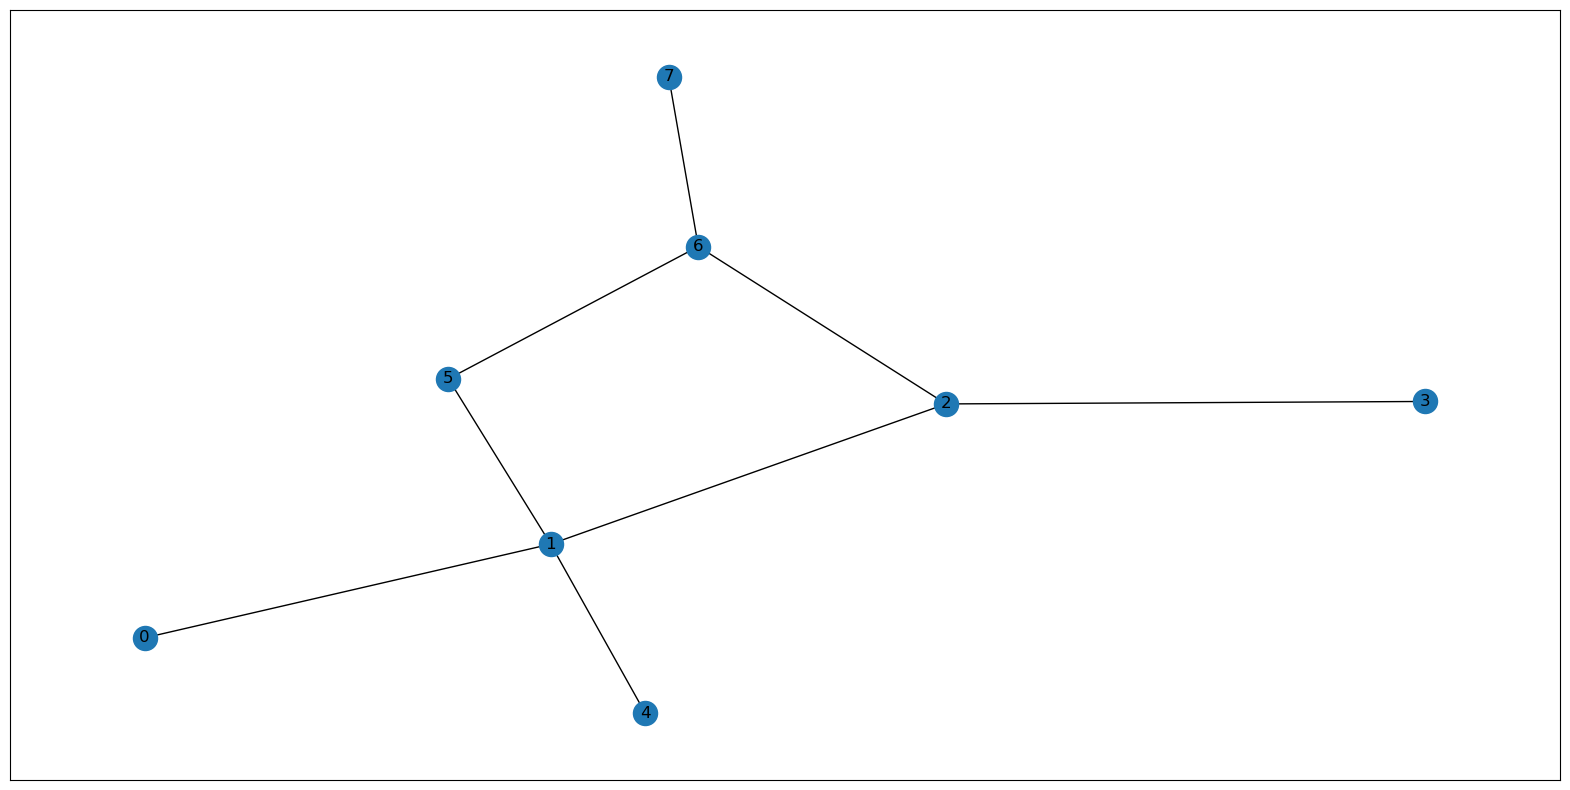

In [52]:
%matplotlib inline
import networkx as nx
G = nx.Graph()
edges = [(0, 1), (1, 2), (2, 3), (1, 4), (1, 5), (5, 6), (6, 7), (2, 6)]

for edge in edges:
    G.add_edge(edge[0], edge[1])
    
nx.draw_networkx(G)    

def bfs(explore_queue, nodes_visited, graph):
    if len(explore_queue) == 0:
        return nodes_visited
    else:
        current_node = explore_queue.pop(0)
        print('visiting node ' + str(current_node))
        for neighbor in G.neighbors(current_node):
            if neighbor in nodes_visited:
                continue
            else:
                nodes_visited[neighbor] = nodes_visited[current_node] + 1
                explore_queue.append(neighbor)
        return bfs(explore_queue, nodes_visited, graph)
    
explore_queue = [0]
nodes_visited = {0: 0}
print(bfs(explore_queue, nodes_visited, G))

Do the distances you see in the network diagram line up with the distances reported by BFS?

### Depth-First Search
There's another way to explore a graph, and it's called **depth-first search**. It's the exact same ideas as BFS, but instead of exploring nodes in an order that corresponds to their proximity to the start node, we traverse entire paths in the graph, until we run out of new nodes, then we go back up to look for new branches. We accomplish this by using a **stack** rather than a **queue**. Queues are like lines at the grocery store. The first item that entered the queue is the first item to leave the queue (FIFO/first in first out). Stacks, however, are like a pile of papers on your desk. The last item that was placed on the top of the stack is the first item you pick up (LIFO/last in first out). 

Let's see how this looks in practice!

visiting node 0
visiting node 1
visiting node 5
visiting node 6
visiting node 7
visiting node 4
visiting node 2
visiting node 3
{0: 0, 1: 1, 2: 2, 4: 2, 5: 2, 6: 3, 7: 4, 3: 3}


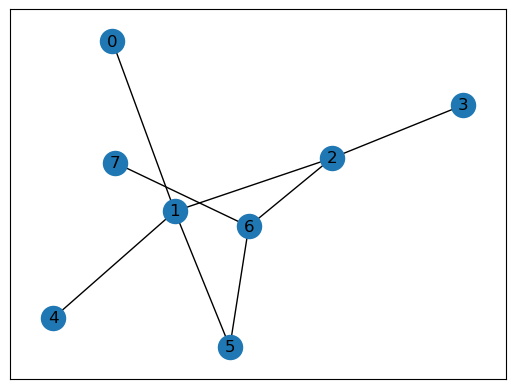

In [2]:
%matplotlib inline
import networkx as nx
G = nx.Graph()
edges = [(0, 1), (1, 2), (2, 3), (1, 4), (1, 5), (5, 6), (6, 7), (2, 6)]

for edge in edges:
    G.add_edge(edge[0], edge[1])
    
nx.draw_networkx(G)    

def dfs(explore_stack, nodes_visited, graph):
    if len(explore_stack) == 0:
        return nodes_visited
    else:
        current_node = explore_stack.pop(-1)
        print('visiting node {}'.format(str(current_node)))
        for neighbor in G.neighbors(current_node):
            if neighbor in nodes_visited:
                continue
            else:
                nodes_visited[neighbor] = nodes_visited[current_node] + 1
                explore_stack.append(neighbor)
        return dfs(explore_stack, nodes_visited, graph)
    
explore_queue = [0]
nodes_visited = {0: 0}
print(dfs(explore_queue, nodes_visited, G))

### Interactive Moment
* What do you notice about the traversal orders for the two algorithms? Are they the same or are they different?
* Can you think of a graph where the traversal orders couold be the same?
* What is the time complexity for BFS? What about DFS?
* We used these algorithms to compute the path length from our start node (node 0). Could we use them to get the shortest paths between all pairs of nodes?
* Does this algorithm still work to obtain correct shortest path lengths when the graph has edge weights? If you don't think so, can you come up with a counterexample?


## Dijkstra's Algorithm & Node/Edge Attributes
Spoiler alert: using BFS/DFS does not work to obtain correct shortest path lengths in a graph that has edge weights. 

We have to use a somewhat fancier algorithm called [Dijkstra's Algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) to find all the shortest paths from a source node in a weighted graph. Here's how it works:

1. We mark all nodes (except the one we're starting from) as unvisited. We don't know how to get to them yet, so we set their distance to $\infty$. The distance to our start node $s$ is set to 0.
2. Next, we look at all the unvisited nodes and pick the one with the smallest distance ($\neq \infty$) from our start node. When we begin the algorithm, this is by default the start node, whose distance is 0. 
3. We look at all the unvisited neighbors of our current node $c$. For each neighbor $n$, if the sum of the distance from $s$ to $c$, plus the distance from $c$ to $n$, is less than the distance we currently have, we update its distance to $d(s, c) + d(c, n)$. Once we've looked at all of $c$'s neighbors, we know that the distance we have from $s$ for $c$ is optimal, and we can mark it as visited. We keep track of the last node that the shortest path between $s$ and $c$ goes through before it reaches $c$. This lets us retrace our steps later and reconstruct the shortest paths.
4. We repeat steps 2 and 3 until we have visited all nodes. Since we've kept track of all nodes' distances and the nodes that make up the shortest paths from $s$ to all other nodes, we can easily reconstruct the shortest paths from $s$ in our graph. 

Dijkstra's original algorithm uses a min-priority queue to figure out which node to visit next; this lets the algorithm run in $O(|V|^2)$ time, where $|V|$ is the number of vertices (nodes) in the graph. How does this work?

For each edge we see, we potentially need to update a distance entry for a particular node. Updating this distance entry is usually a constant-time operation ($O(1)$), so this part of the computation is $O(|E|)$, where $|E|$ denotes the number of edges in the graph.

Additionally, for each vertex, we need to find the node with the smallest distance to visit next. With a naive approach (a min-priority queue), this is an $O(|V|)$ operation. Therefore, the total cost of doing this once per vertex is $O(|V|^2)$. We can incorporate newer, fancier data structures (e.g. a [Fibonacci heap](https://en.wikipedia.org/wiki/Fibonacci_heap)) to make this operation cost $O(\log(|V|)$ time.

If we use the min-priority queue, the $O(|V|^2)$ term dominates, so the runtime is simply $O(|V|^2)$. However, if we use a Fibonacci heap, the runtime is $O(|E| + |V| \log|V|)$; we don't know if $|E|$ is necessarily bigger than $|V| \log|V|$, as that depends on the average degree of the graph we're working with.

I won't torment you by making you code up Dijkstra's Algorithm, but let's try it out and see it in action!

## Paris Public Transit Network

Using a dataset sourced [here](https://www.nature.com/articles/sdata201889), we're going to practice constructing a transit network, complete with node and edge attributes, and then we'll try out Dijkstra's Algorithm on the resulting masterpiece. 

In [53]:
import pandas as pd

paris = nx.DiGraph()

# entering node information, including latitude/longitude coordinates
df_nodes = pd.read_csv('data/paris/network_nodes.csv', sep=';')
for idx, node in df_nodes.iterrows():
    paris.add_node(node['stop_I'], lat=node['lat'], lon=node['lon'], name=node['name'])

# entering transit route information
for transit_type in ['bus', 'rail', 'subway', 'tram']:
    df_transit = pd.read_csv('data/paris/network_{}.csv'.format(transit_type), sep=';')
    for idx, edge in df_transit.iterrows():
        paris.add_edge(
            edge.from_stop_I, 
            edge.to_stop_I, 
            distance=edge.d, 
            duration=edge.duration_avg,
            transit_type=transit_type
        )
 
# adding walking route information, including estimated walking duration
df_walkies = pd.read_csv('data/paris/network_walk.csv', sep=';')
for idx, edge in df_walkies.iterrows():
    paris.add_edge(
        edge.from_stop_I, 
        edge.to_stop_I, 
        distance=edge.d, 
        duration=edge.d_walk * 1.3, # using 1.3 m/s as human walking speed
        transit_type=transit_type
    )


In [54]:
print(df_nodes)

       stop_I        lat       lon                              name
0           1  48.826948  2.367038                        Olympiades
1           3  48.829831  2.376120  Bibliothèque-François Mitterrand
2           5  48.833314  2.387300                Cour Saint-Emilion
3           7  48.840543  2.379409                             Bercy
4           9  48.844652  2.373108                      Gare de Lyon
...       ...        ...       ...                               ...
11945   27555  48.908165  2.517025                            GARGAN
11946   27556  48.902444  2.511699        LES PAVILLONS SOUS BOIS T4
11947   27557  48.897144  2.506408      ALLEE DE LA TOUR RENDEZ VOUS
11948   27558  48.892505  2.499388                    LES COQUETIERS
11949   27559  48.893095  2.487911                  REMISE A JORELLE

[11950 rows x 4 columns]


### Transit Time Distribution
Let's look at the distribution of transit durations from node 1 (Olympiades) using Dijkstra's Algorithm. Then we'll see how transit durations correspond to total geographic distance between stops.

2


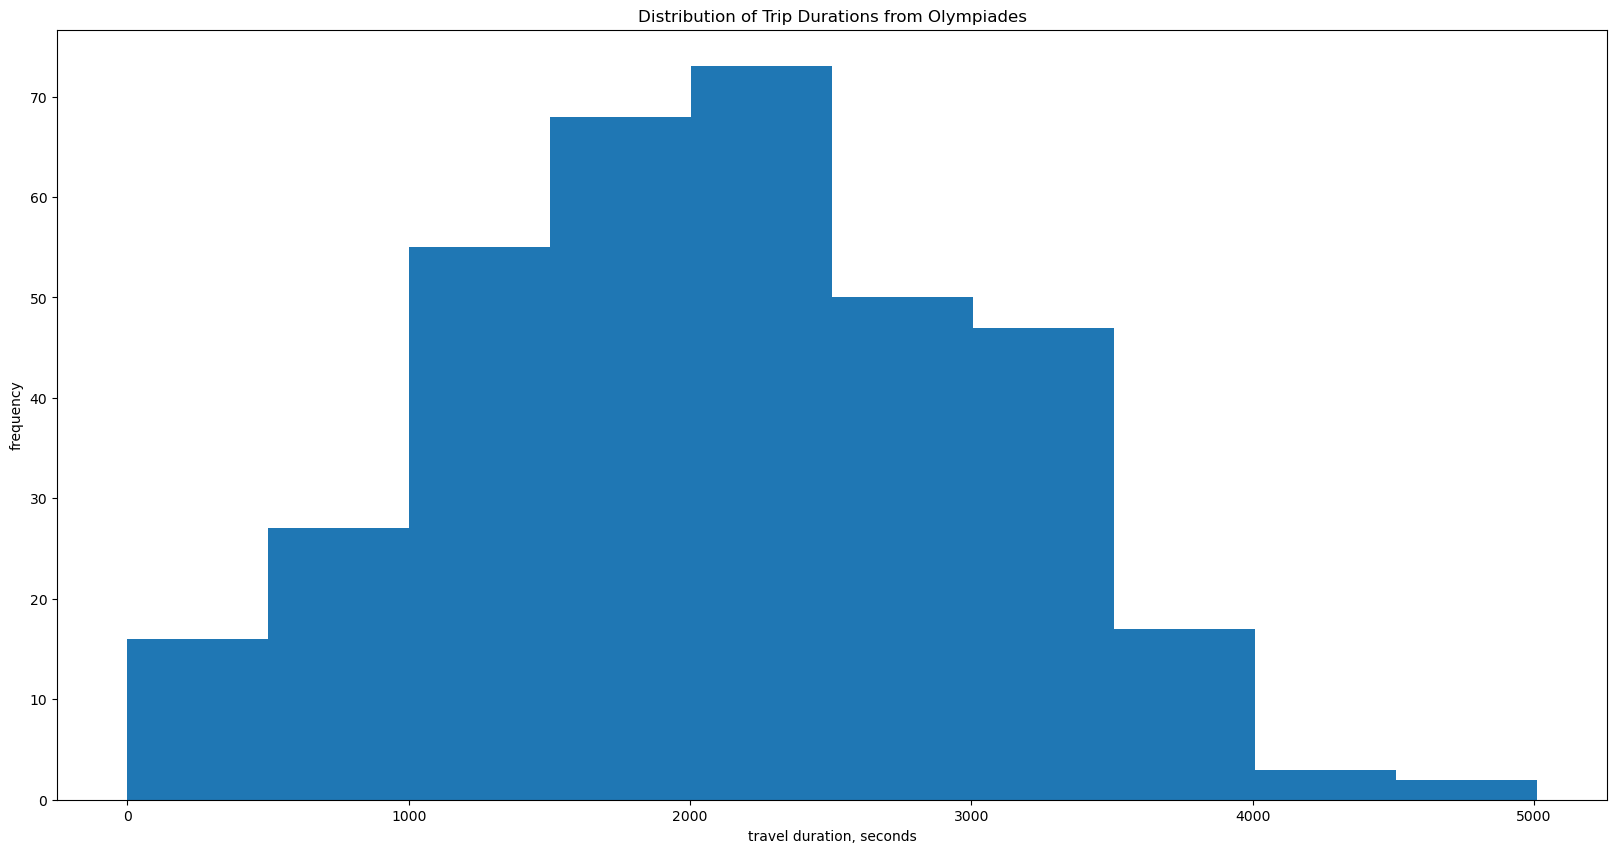

In [55]:
%matplotlib inline
node_number = 27000
import matplotlib.pyplot as plt
single_source_paths = nx.single_source_dijkstra(paris, node_number, weight='duration')
durations = [v for v in single_source_paths[0].values()] 
plt.hist(durations)
plt.xlabel('travel duration, seconds')
plt.ylabel('frequency')
plt.title('Distribution of Trip Durations from Olympiades')
print(len(single_source_paths))

In [56]:
import geopy.distance # package that lets us compute geodesic distance between latitude/longitude coordinates
source_lat_lon = (paris.nodes[node_number]['lat'], paris.nodes[node_number]['lon'])
distances = {}
for node in paris.nodes:
    try:
        distances[node] = geopy.distance.geodesic(source_lat_lon, (paris.nodes[node]['lat'], paris.nodes[node]['lon']))
    except KeyError:
        # we might not have lat/lon coordinates for every node!
        continue

Text(0.5, 1.0, 'Trip duration versus geodesic distance')

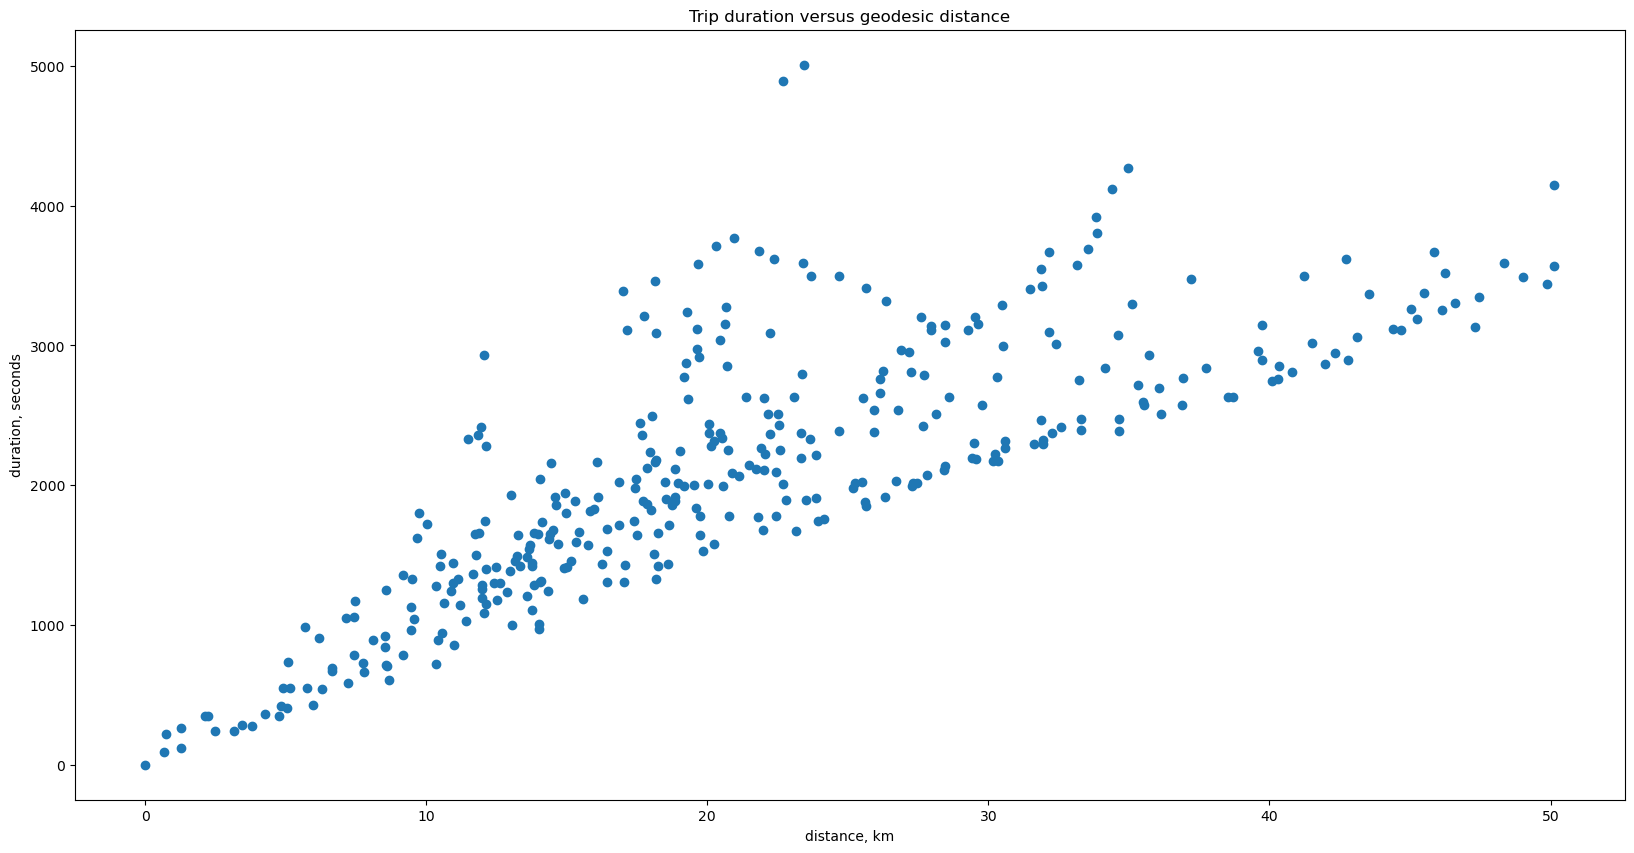

In [57]:
plt.rcParams["figure.figsize"] = (20,10)
geodesic_dists = []
duration_trip = []
for node in paris.nodes:
    if node in distances and node in single_source_paths[0]:
        geodesic_dists.append(distances[node].km)
        duration_trip.append(single_source_paths[0][node])
plt.scatter(geodesic_dists, duration_trip)
plt.xlabel('distance, km')
plt.ylabel('duration, seconds')
plt.title('Trip duration versus geodesic distance')

### Looking at Different Stations
* What happens if you run this code for a bunch of different stations? What patterns do you notice? 
* What does the travel time distribution look like for several start nodes in aggregate? 

In [11]:
# Your Turn!

single_source_paths = nx.single_source_dijkstra(paris, 519, weight='duration')
durations = [v for v in single_source_paths[0].values()]
# plt.hist(durations)
# plt.xlabel('travel duration, seconds')
# plt.ylabel('frequency')
# plt.title('Distribution of Trip Durations from ')

source_lat_lon = (paris.nodes[519]['lat'], paris.nodes[519]['lon'])
distances = {}
for node in paris.nodes:
    try:
        distances[node] = geopy.distance.geodesic(source_lat_lon, (paris.nodes[node]['lat'], paris.nodes[node]['lon']))
    except KeyError:
        # we might not have lat/lon coordinates for every node!
        continue

plt.rcParams["figure.figsize"] = (20,10)
geodesic_dists = []
duration_trip = []
for node in paris.nodes:
    if node in distances and node in single_source_paths[0]:
        geodesic_dists.append(distances[node].km)
        duration_trip.append(single_source_paths[0][node])
plt.scatter(geodesic_dists, duration_trip)
plt.xlabel('distance, km')
plt.ylabel('duration, seconds')
plt.title('Trip duration versus geodesic distance')

NodeNotFound: Node 519 not found in graph

## Fun Coding Activity:
Look at the documentation for the `single_source_paths` function. You'll notice that it returns a tuple; the first entry contains the total distances from the source to each target, but the second entry contains the sequence of stations used to get from the source station to the target station. 

Write a function that takes a pair of station IDs and returns the following:
* If one or both of the stations does not exist, raise an error.
* If there is no path in the graph between the two stations, raise an error.
* If there is a path between the two stations, look at the sequence of stations traversed and indicate the transit type for each edge. Also indicate the total transit time. 

In Python, we raise exceptions using the following syntax:
```
def divide(x, y):
    # Divide x by y. Raise an error if y = 0.
    if y == 0:
        raise ValueError('No division by 0')
    else:
        return x / y
```
There are a bunch of common error types; you can browse them [here](https://www.tutorialsteacher.com/python/error-types-in-python). 

In [34]:
single_source_paths = nx.single_source_dijkstra(paris, 1, 100, weight = 'duration')

In [35]:
single_source_paths[1]

[1, 3, 5, 7, 325, 336, 337, 428, 100]

In [37]:
paris.edges[3,5]

{'distance': 906, 'duration': 78.87201735357918, 'transit_type': 'subway'}

In [77]:
single_source_path = nx.single_source_dijkstra(paris, 1, 100, weight = 'duration')
path = single_source_path[1]
route_info = []
for i in range(len(path)-1):
    route_info.append(paris.edges[path[i], path[i+1]])

In [78]:
single_source_path

(4375.669849195141, [1, 3, 5, 7, 325, 336, 337, 428, 100])

In [79]:
route_info

[{'distance': 739, 'duration': 1064.7, 'transit_type': 'tram'},
 {'distance': 906, 'duration': 78.87201735357918, 'transit_type': 'subway'},
 {'distance': 990, 'duration': 101.77874186550976, 'transit_type': 'subway'},
 {'distance': 626, 'duration': 1015.3000000000001, 'transit_type': 'tram'},
 {'distance': 2711, 'duration': 198.7974683544304, 'transit_type': 'rail'},
 {'distance': 38, 'duration': 54.6, 'transit_type': 'tram'},
 {'distance': 2237, 'duration': 240.0, 'transit_type': 'rail'},
 {'distance': 20903, 'duration': 1621.6216216216217, 'transit_type': 'rail'}]

In [89]:
def transit_between_stations(source, target, city_graph):
    """
    Given node IDs source and target (integers),
    find a path in city_graph (networkx directed graph) between the two stations.
    Indicate which transit type is used for each edge traversed, and indicate the total transit time. 
    Raise errors if the node IDs are invalid or no path exists.
    """
    if source not in list(city_graph.nodes()):
        raise Exception('source node must be in graph')
    if target not in list(city_graph.nodes()):
        raise Exception('target node must be in graph')
    single_source_path = nx.single_source_dijkstra(city_graph, source, target, weight = 'duration')
    path = single_source_path[1]
    route_info = []
    for i in range(len(path)-1):
        route_info.append(city_graph.edges[path[i], path[i+1]])
    return (path, route_info)

In [94]:
path, route_info = transit_between_stations(1, 100, paris)

In [95]:
path

[1, 3, 5, 7, 325, 336, 337, 428, 100]

In [96]:
route_info

[{'distance': 739, 'duration': 1064.7, 'transit_type': 'tram'},
 {'distance': 906, 'duration': 78.87201735357918, 'transit_type': 'subway'},
 {'distance': 990, 'duration': 101.77874186550976, 'transit_type': 'subway'},
 {'distance': 626, 'duration': 1015.3000000000001, 'transit_type': 'tram'},
 {'distance': 2711, 'duration': 198.7974683544304, 'transit_type': 'rail'},
 {'distance': 38, 'duration': 54.6, 'transit_type': 'tram'},
 {'distance': 2237, 'duration': 240.0, 'transit_type': 'rail'},
 {'distance': 20903, 'duration': 1621.6216216216217, 'transit_type': 'rail'}]

In [62]:
1+2

3

## Resources
The Paris dataset we use here is just the tip of the iceberg with respect to the wealth of data this publication ([Kujala et al., 2018](https://www.nature.com/articles/sdata201889)) released. Check out the link to see even more city transit data!

For more on the subtleties of computing distances on Earth, which is spherical-ish but not spherical enough, check out [this StackOverflow thread](https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude).

You may find the Wikipedia article on [Dijkstra's Algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) to be useful; these MIT OCW [lecture notes](https://ocw.mit.edu/courses/6-006-introduction-to-algorithms-spring-2020/d819e7f4568aced8d5b59e03db6c7b67_MIT6_006S20_lec13.pdf) may also prove handy.

The [Bellman-Ford algorithm](https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm) for finding single-source shortest paths can also handle negative cycles, which Dijkstra's algorithm cannot. The [Floyd-Warshall algorithm](https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm) solves the all-pairs shortest paths problem.

If you're interested in computing paths and/or computational complexity, you may find reading about the [traveling salesman problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem) and NP-hardness/NP-completeness to be intriguing. 

[More on exception raising in Python code](https://realpython.com/python-raise-exception/)